# MAP 433
## Groupe 2
### DM 3 - X23

- COSTA, Caio;
- SILVA CLAUDINO, Ariel;
- ZUIN RUIZ, Luis Henrique

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Data normalization
X = (X - X.mean())/X.std()

display(X)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


## Analyse des données
### Question 1.1

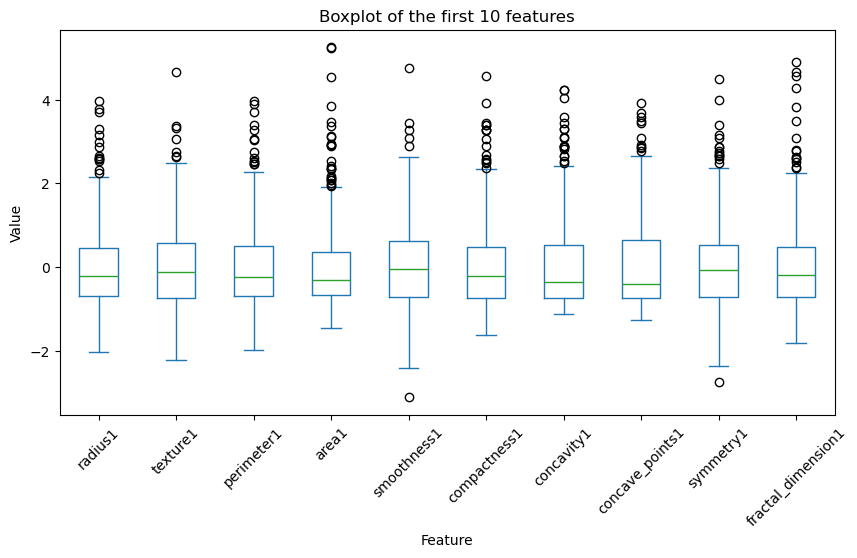

In [25]:
X.iloc[:, :10].plot(kind='box', figsize=(10, 5))
plt.title('Boxplot of the first 10 features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()

On peut voir dans les boxplots ci-dessus qu'ils ont tous beaucoup d'outliers au-dessus mais presque aucun au-dessous. Cela signifie que les valeurs sont généralement plus élevées que la moyenne, mais il y a quelques valeurs extrêmement élevées qui tirent la moyenne vers le haut.

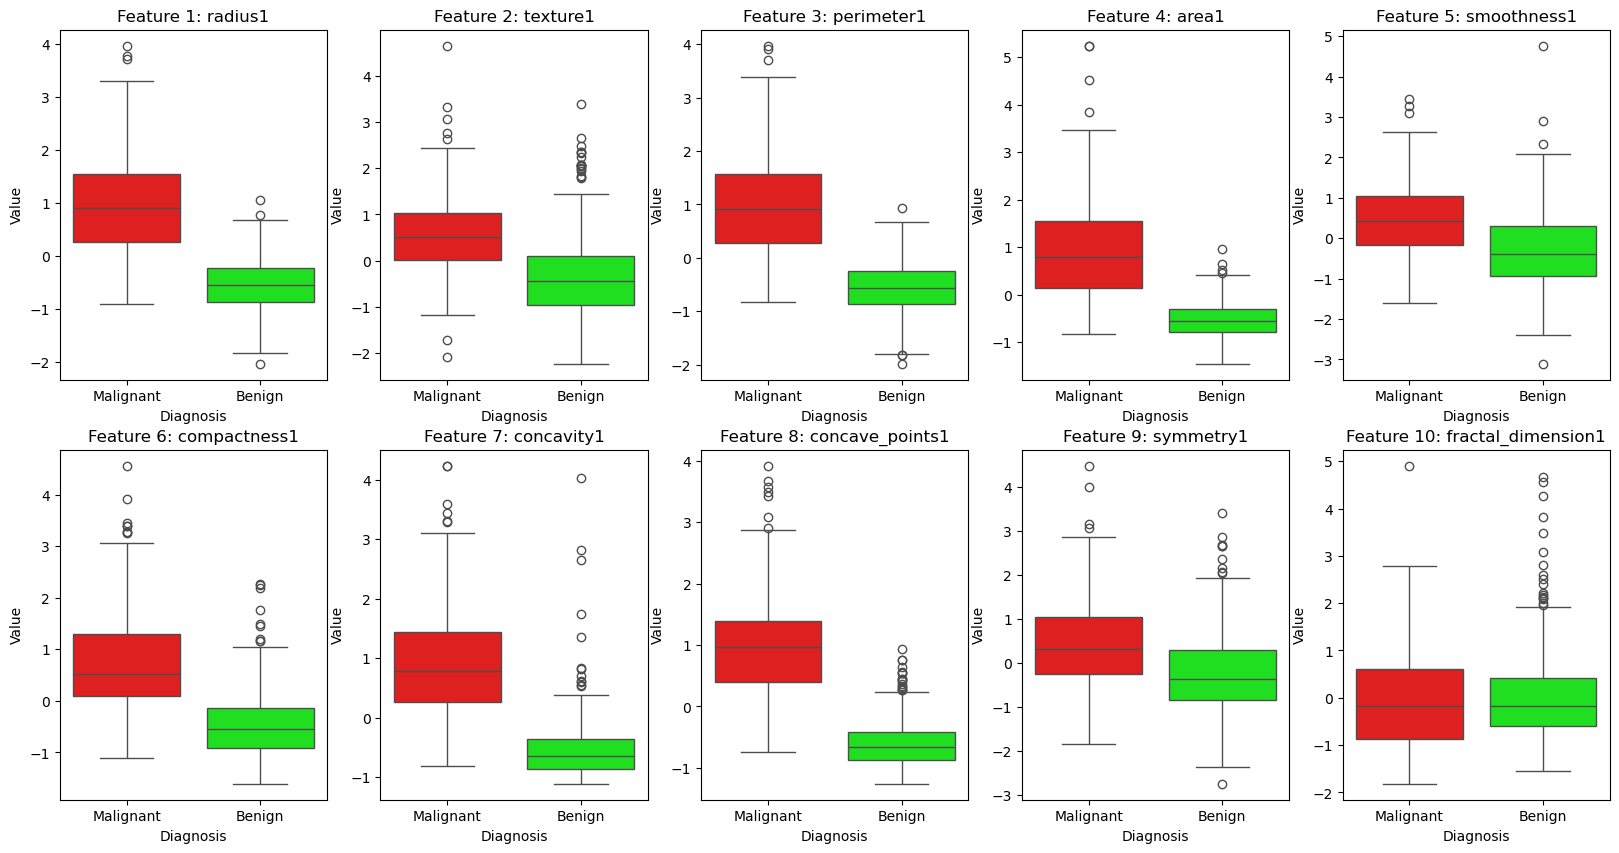

In [ ]:
X_with_diagnosis = X.copy()
X_with_diagnosis['Diagnosis'] = y
X_with_diagnosis['Diagnosis'] = X_with_diagnosis['Diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'})

pallete = [(1,0,0), (0,1,0)]
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='Diagnosis', y=X_with_diagnosis.columns[i], data=X_with_diagnosis, ax=ax, palette=pallete, hue='Diagnosis')
    ax.set_title(f'Feature {i+1}: {X_with_diagnosis.columns[i]}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Diagnosis')


Dans une seconde étape, nous nous intéressons à la distribution des valeurs des features en fonction de la classe de diagnosis. On peut voir que les valeurs des features sont généralement plus élevées pour les tumeurs malignes que pour les tumeurs bénignes. Cela signifie que les valeurs des features peuvent être utilisées pour distinguer les tumeurs malignes des tumeurs bénignes.

### Question 1.2

/var/folders/_2/lbzltchs58120525lxknjs040000gn/T/ipykernel_38710/3194460187.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_data = y_data.replace({"M": 1, "B": 0}, inplace=False).astype(y_dtype)


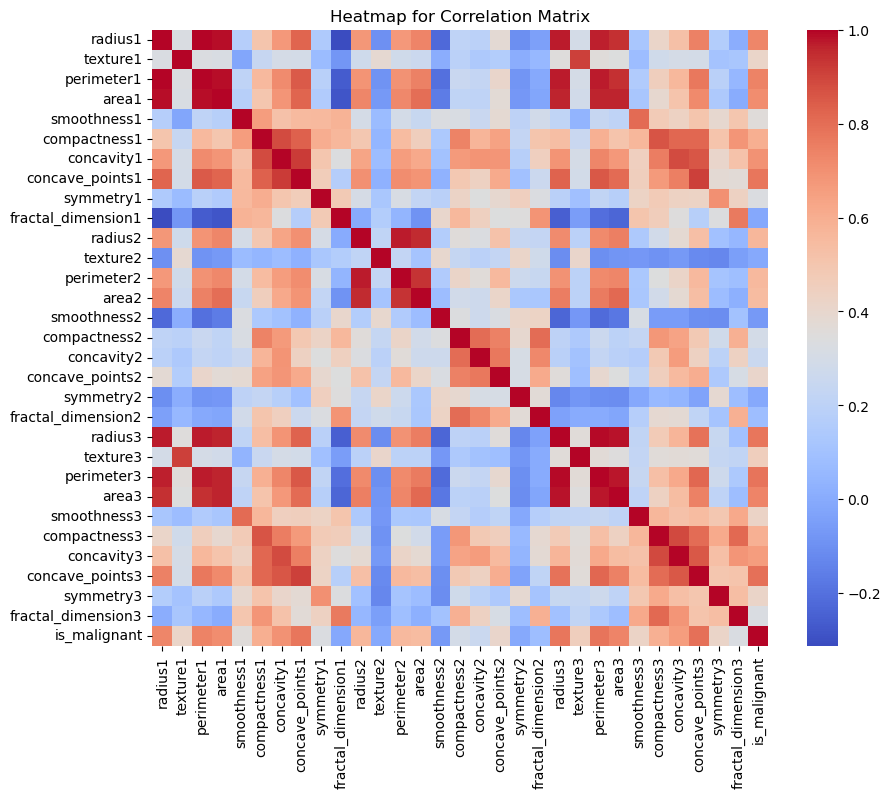

In [27]:
y_dtype = {"is_malignant": float}
y_data = y.rename({"Diagnosis": "is_malignant"}, axis=1, inplace=False)
y_data = y_data.replace({"M": 1, "B": 0}, inplace=False).astype(y_dtype)
data = pd.concat([X.iloc[:, :], y_data], axis=1)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap for Correlation Matrix")

# Show the plot
plt.show()

### Question 1.3


Premièrement, il est essentiel de considérer les points suivants :
1.	Des colonnes fortement corrélées augmentent la complexité du modèle, alors que des colonnes indépendantes apportent des informations distinctes. Idéalement, ces colonnes devraient présenter une corrélation significative (mais non triviale) avec la variable d’intérêt.
2.	Les colonnes présentant une corrélation proche de ±1 transmettent des informations redondantes et peuvent introduire de la multicolinéarité dans le modèle, ce qui peut accroître sa complexité de manière inutile, en particulier pour les modèles linéaires comme le nôtre.
3.	À l’inverse, des colonnes dont la corrélation est proche de 0 sont plus susceptibles d’être indépendantes et donc de fournir des informations uniques. En conséquence, il serait judicieux de privilégier les colonnes ayant de faibles corrélations avec un grand nombre d’autres colonnes.

En analysant notre matrice de corrélation, nous remarquons que les paramètres radius, perimeter et area contiennent des informations redondantes. Il pourrait donc être pertinent de ne conserver qu’un seul de ces paramètres. Un phénomène similaire, bien que moins intense, se retrouve entre les colonnes compactness, concavity et concave_points.

Par ailleurs, les paramètres texture, smoothness, symmetry et fractal_dimension présentent des corrélations relativement faibles par rapport aux autres colonnes, ce qui suggère de les conserver dans le modèle.

Une sélection possible de colonnes, en tenant compte de ces observations, pourrait être : [radius, texture, smoothness, compactness, symmetry, fractal_dimension].

Notre matrice de corrélation révèle des regroupements entre radius, perimeter et area, ce qui est logique puisqu’ils sont liés par nature. De même, une forte corrélation existe entre compactness, concavity et concave_points, tandis que des corrélations négatives apparaissent avec les variables fractal_dimension, smoothness et texture.

Enfin, aucune variable n’affiche une corrélation notable avec la variable cible diagnosis, ce qui suggère que cette dernière pourrait nécessiter une approche spécifique.

Remarque : une analyse complémentaire pourrait consister à identifier les colonnes les plus corrélées avec la variable d’intérêt pour affiner notre sélection.

## Analyse en Composantes Principales (ACP)

In [28]:
d_tilde = 3

### Question 2.1

In [29]:
cov_matrix = X.cov()
d = np.shape(cov_matrix)[0]
print('Forme de la matrix de covariance', np.shape(cov_matrix))
cov_matrix

Forme de la matrix de covariance (30, 30)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Question 2.2

In [30]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

### Question 2.3

In [ ]:
# sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# print first d_tilde eigenvalues and corresponding eigenvectors
print("Les premiers", d_tilde, "valeurs propres et vecteurs propres:")
print()
for i in range(d_tilde):
    print('Valeur propre', i+1, ':', eigenvalues[i])
    print('Vecteur propre', i+1, ':', eigenvectors[:, i])
    print()

Les premiers 3 valeurs propres et vecteurs propres:

Valeur propre 1 : 13.281607682257917
Vecteur propre 1 : [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

Valeur propre 2 : 5.6913546132099215
Vecteur propre 2 : [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]

Valeur propre 3 : 2.8179489772294155
Vecteur propre 3 : [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
  0

### Question 2.4

In [32]:
A = eigenvectors[:, :d_tilde]
A

array([[ 0.21890244, -0.23385713, -0.00853124],
       [ 0.10372458, -0.05970609,  0.0645499 ],
       [ 0.22753729, -0.21518136, -0.00931422],
       [ 0.22099499, -0.23107671,  0.02869953],
       [ 0.14258969,  0.18611302, -0.1042919 ],
       [ 0.23928535,  0.15189161, -0.07409157],
       [ 0.25840048,  0.06016536,  0.00273384],
       [ 0.26085376, -0.0347675 , -0.02556354],
       [ 0.13816696,  0.19034877, -0.04023994],
       [ 0.06436335,  0.36657547, -0.02257409],
       [ 0.20597878, -0.10555215,  0.26848139],
       [ 0.01742803,  0.08997968,  0.37463367],
       [ 0.21132592, -0.08945723,  0.26664537],
       [ 0.20286964, -0.15229263,  0.21600653],
       [ 0.01453145,  0.20443045,  0.30883898],
       [ 0.17039345,  0.2327159 ,  0.15477972],
       [ 0.15358979,  0.19720728,  0.17646374],
       [ 0.1834174 ,  0.13032156,  0.22465757],
       [ 0.04249842,  0.183848  ,  0.28858429],
       [ 0.10256832,  0.28009203,  0.21150376],
       [ 0.22799663, -0.21986638, -0.047

### Question 2.5

In [33]:
x_projected = X @ A
x_projected.rename(columns={0: 'x0', 1: 'x1', 2: 'x2'}, inplace=True)

print('Forme de la matrice projetée:', np.shape(x_projected))
x_projected

Forme de la matrice projetée: (569, 3)


,x0,x1,x2
0,9.184755,1.946870,-1.122179
1,2.385703,-3.764859,-0.528827
2,5.728855,-1.074229,-0.551263
3,7.116691,10.266556,-3.229948
4,3.931842,-1.946359,1.388545
...,...,...,...
564,6.433655,-3.573673,2.457324
565,3.790048,-3.580897,2.086640
566,1.255075,-1.900624,0.562236
567,10.365673,1.670540,-1.875379


### Question 2.6

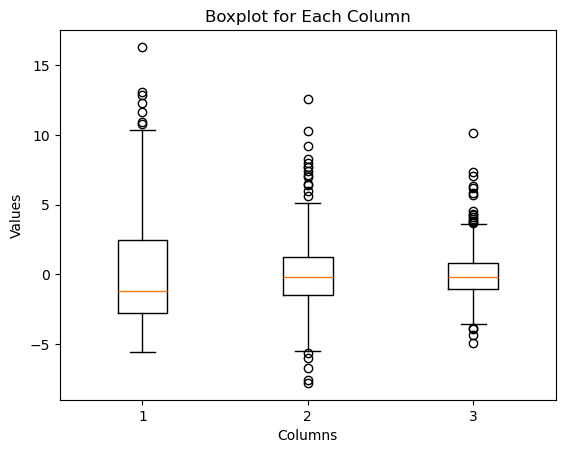

In [34]:
plt.boxplot(x_projected)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplot for Each Column")
plt.show()

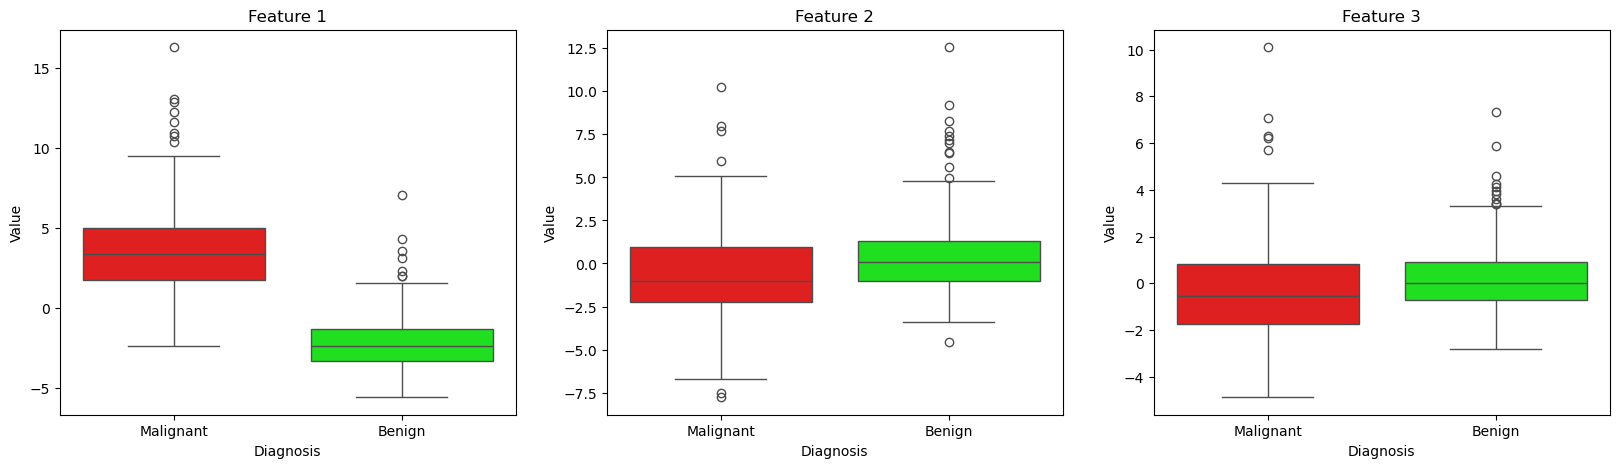

In [35]:
x_projected_with_diagnosis = x_projected.copy()
x_projected_with_diagnosis['Diagnosis'] = y
x_projected_with_diagnosis['Diagnosis'] = x_projected_with_diagnosis['Diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'})

pallete = [(1,0,0), (0,1,0)]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='Diagnosis', y=x_projected_with_diagnosis.columns[i], data=x_projected_with_diagnosis, ax=ax, palette=pallete, hue='Diagnosis')
    ax.set_title(f'Feature {i+1}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Diagnosis')

On voit ici que la feature 1 après l'ACP est la feature la plus explicative, car le boxplot de la feature 1 est le plus différent entre les tumeurs malignes et bénignes. Cela signifie que la feature 1 est la plus importante pour distinguer les tumeurs malignes des tumeurs bénignes.

### Question 2.7

/var/folders/_2/lbzltchs58120525lxknjs040000gn/T/ipykernel_38710/197298585.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_projected_with_target['Diagnosis'] = x_projected_with_target['Diagnosis'].replace({'M': 1, 'B': -1})


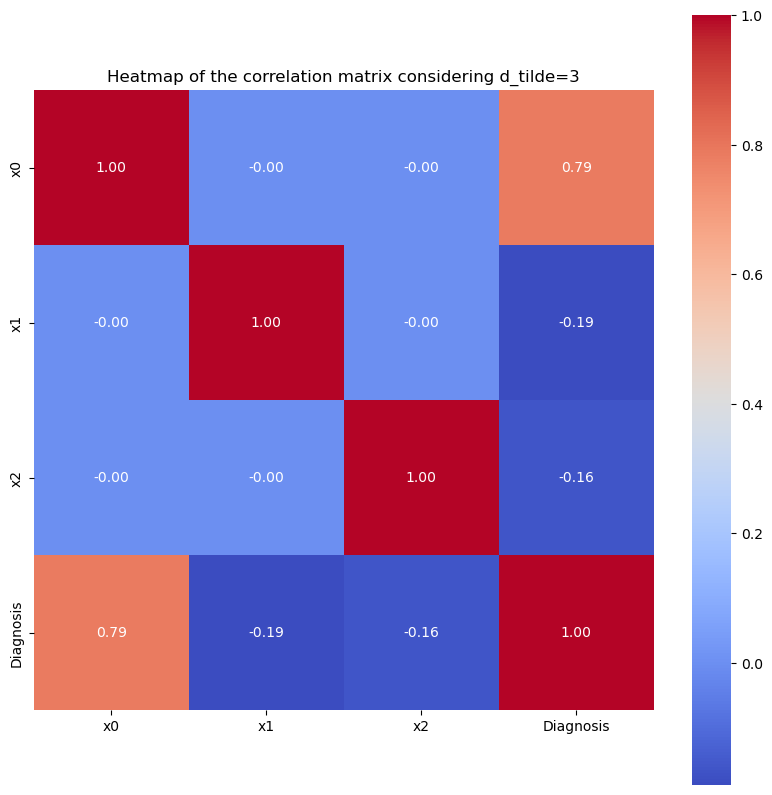

In [36]:
x_projected_with_target = x_projected.copy()
x_projected_with_target['Diagnosis'] = y
x_projected_with_target['Diagnosis'] = x_projected_with_target['Diagnosis'].replace({'M': 1, 'B': -1})

plt.figure(figsize=(10, 10))
sns.heatmap(x_projected_with_target.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of the correlation matrix considering d_tilde=3')
plt.show()

On voit une parfaite indépendance entre les composantes principales, ce qui est logique car les composantes principales sont construites pour être indépendantes les unes des autres. On voit aussi une forte corrélation positive entre la première composante principale et le target diagnosis, ce qui signifie que la première composante principale est la plus importante pour distinguer les tumeurs malignes des tumeurs bénignes, comme on l'a vu dans les boxplots précédents.

On remarque aussi que les corrélations entre les deux autres composantes principales et le target diagnosis sont plus faibles et négatives, ce qui signifie que ces deux composantes principales sont moins importantes pour distinguer les tumeurs malignes des tumeurs bénignes.

### Question 2.8

In [37]:
y_dtype = {"is_malignant": bool}
y_data = y.rename({"Diagnosis": "is_malignant"}, axis=1, inplace=False)
y_data = y_data.replace({"M": True, "B": False}, inplace=False).astype(y_dtype)
x_data = pd.DataFrame(data=x_projected, columns=[f"x{i}" for i in range(d_tilde)])

data = pd.concat([y_data, x_data], axis=1)
display(data)

/var/folders/_2/lbzltchs58120525lxknjs040000gn/T/ipykernel_38710/2897009488.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_data = y_data.replace({"M": True, "B": False}, inplace=False).astype(y_dtype)


,is_malignant,x0,x1,x2
0,True,9.184755,1.946870,-1.122179
1,True,2.385703,-3.764859,-0.528827
2,True,5.728855,-1.074229,-0.551263
3,True,7.116691,10.266556,-3.229948
4,True,3.931842,-1.946359,1.388545
...,...,...,...,...
564,True,6.433655,-3.573673,2.457324
565,True,3.790048,-3.580897,2.086640
566,True,1.255075,-1.900624,0.562236
567,True,10.365673,1.670540,-1.875379


### Question 2.9

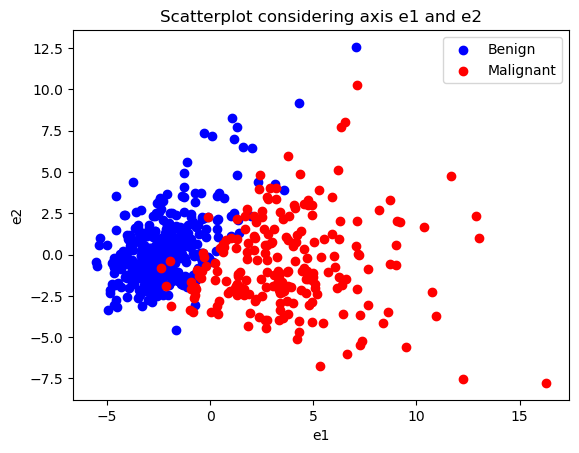

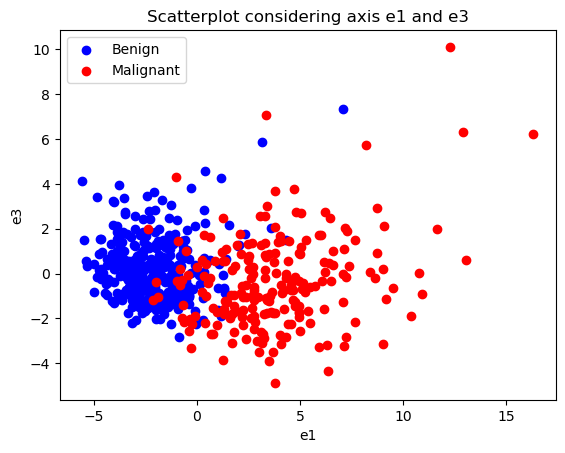

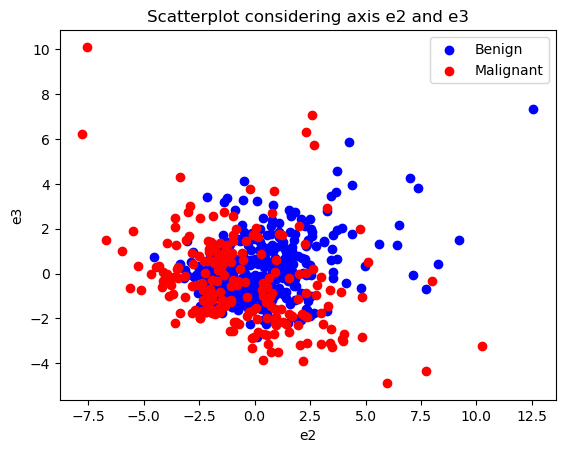

In [38]:
data_m = data[data["is_malignant"]].drop("is_malignant", axis=1, inplace=False)

data_b = data[~data["is_malignant"]].drop("is_malignant", axis=1, inplace=False)

indexes = [[0, 1], [0,2], [1,2]]

for index in indexes:
    x1 = data_b.iloc[:,index[0]]
    y1 = data_b.iloc[:,index[1]]
    x2 = data_m.iloc[:,index[0]]
    y2 = data_m.iloc[:,index[1]]
    plt.scatter(x1, y1, c="b", label="Benign")
    plt.scatter(x2, y2, c="r", label="Malignant")
    plt.xlabel(f"e{index[0]+1}")
    plt.ylabel(f"e{index[1]+1}")
    plt.title(f"Scatterplot considering axis e{index[0]+1} and e{index[1]+1}")
    plt.legend()
    plt.show()

### Question 2.10

In [39]:
class_0 = data_b.values
class_1 = data_m.values
x_total = pd.concat([data_b, data_m], axis=0).values

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

Sw = np.zeros((data_m.shape[1], data_m.shape[1]))
for c, mean_vec in zip((class_0, class_1), (mean_0, mean_1)):
    scatter_matrix = np.dot((c - mean_vec).T, (c - mean_vec))
    Sw += scatter_matrix

overall_mean = np.mean(x_total, axis=0)
mean_diff_0 = (mean_0 - overall_mean).reshape(-1, 1)
mean_diff_1 = (mean_1 - overall_mean).reshape(-1, 1)
n_0, n_1 = class_0.shape[0], class_1.shape[0]
Sb = n_0 * np.dot(mean_diff_0, mean_diff_0.T) + n_1 * np.dot(mean_diff_1, mean_diff_1.T)

eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

sorted_indices = np.argsort(abs(eigenvalues))[::-1]
lda_vector = eigenvectors[:, sorted_indices[0]].real 

X_lda = x_total.dot(lda_vector)

print("LDA Vector:", lda_vector)

LDA Vector: [ 0.86334747 -0.31626912 -0.39319841]


### Question 2.11

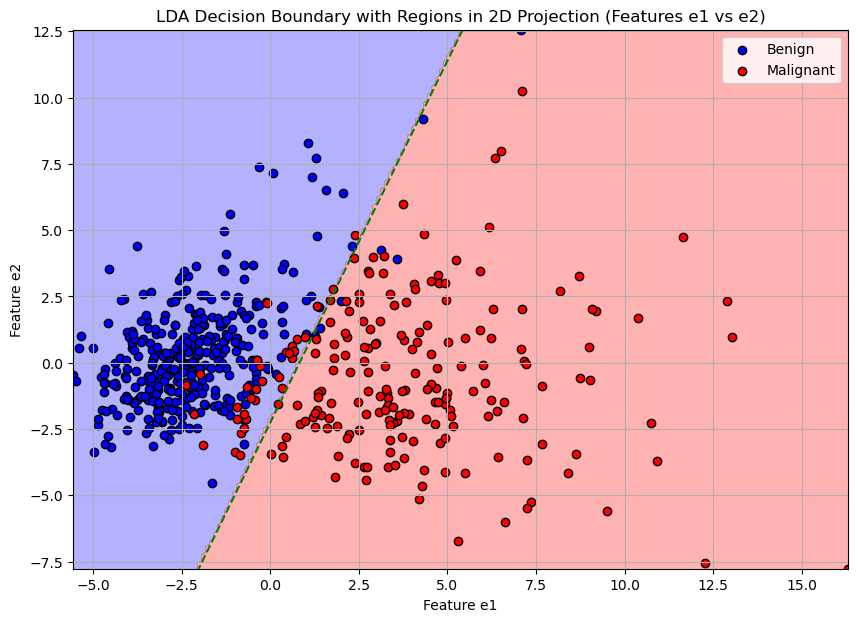

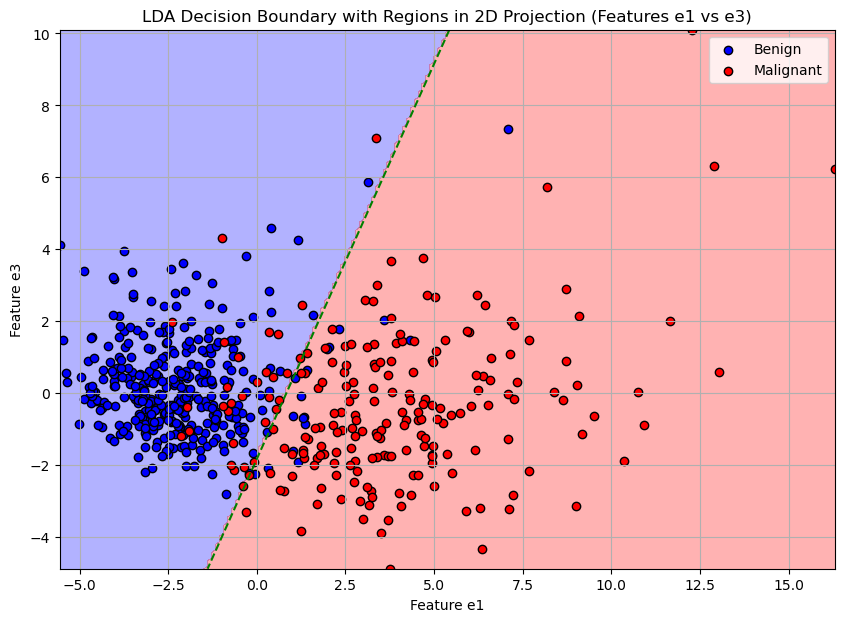

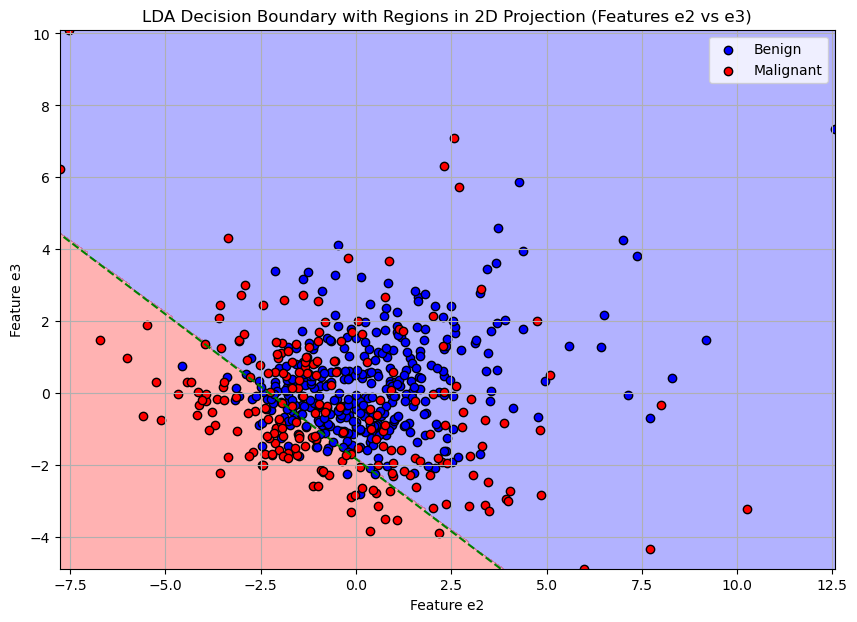

In [ ]:
indexes = [[0, 1, 2], [0, 2, 1], [1, 2, 0]]

for index in indexes:
    x_axis, y_axis, z_axis = index[0], index[1], index[2]

    x_min, x_max = x_total[:, x_axis].min(), x_total[:, x_axis].max()
    y_min, y_max = x_total[:, y_axis].min(), x_total[:, y_axis].max()
    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = np.linspace(y_min, y_max, 200)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    
    x_flat = x_grid.ravel()
    y_flat = y_grid.ravel()
    
    z_mean = x_total[:, z_axis].mean()
    z_flat = np.full_like(x_flat, z_mean)
    
    X_grid = np.zeros((x_flat.shape[0], 3))
    X_grid[:, x_axis] = x_flat
    X_grid[:, y_axis] = y_flat
    X_grid[:, z_axis] = z_flat

    c = np.dot(lda_vector, (mean_0 + mean_1) / 2)
    
    decision_values = np.dot(X_grid, lda_vector) - c
    decision_grid = decision_values.reshape(x_grid.shape)
    
    plt.figure(figsize=(10, 7))
    
    plt.contourf(x_grid, y_grid, decision_grid >= 0, alpha=0.3, levels=[-1, 0, 1], colors=('blue', 'red'))
    
    plt.contour(x_grid, y_grid, decision_grid, levels=[0], colors='green', linestyles='--')
    
    plt.scatter(class_0[:, x_axis], class_0[:, y_axis], color='blue', label="Benign", edgecolor='k')
    plt.scatter(class_1[:, x_axis], class_1[:, y_axis], color='red', label="Malignant", edgecolor='k')
    
    plt.xlabel(f"Feature e{x_axis+1}")
    plt.ylabel(f"Feature e{y_axis+1}")
    plt.title(f"LDA Decision Boundary with Regions in 2D Projection (Features e{x_axis+1} vs e{y_axis+1})")
    plt.legend()
    plt.grid(True)
    plt.show()

### Question 2.12

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

y_data_np = y_data.values.ravel()

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_data, y_data_np)

QuadraticDiscriminantAnalysis()

### Question 2.13

/Users/caio/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


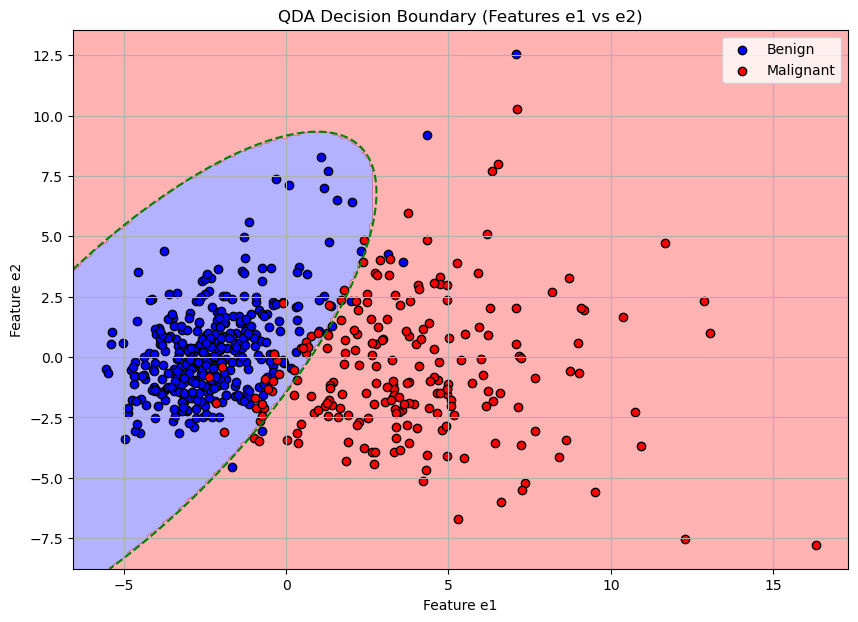

/Users/caio/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


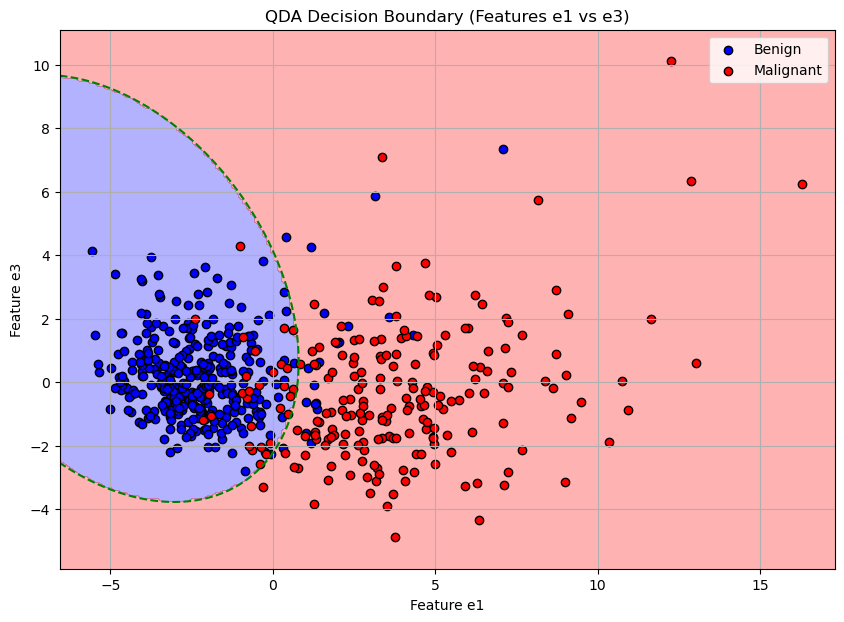

/Users/caio/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


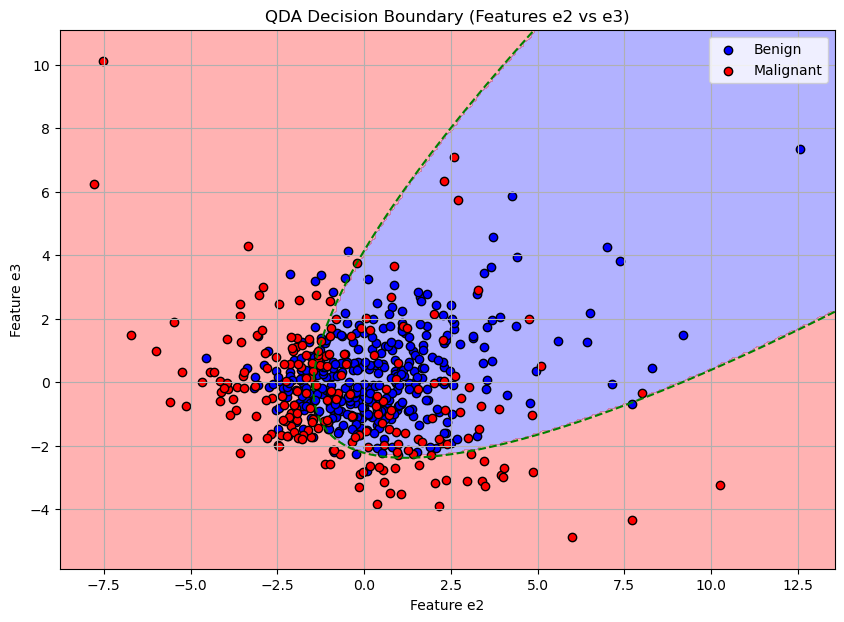

In [42]:
indexes = [[0, 1, 2], [0, 2, 1], [1, 2, 0]]

for index in indexes:
    x_axis, y_axis, z_axis = index
    
    x_min, x_max = x_data.iloc[:, x_axis].min() - 1, x_data.iloc[:, x_axis].max() + 1
    y_min, y_max = x_data.iloc[:, y_axis].min() - 1, x_data.iloc[:, y_axis].max() + 1
    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = np.linspace(y_min, y_max, 200)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    
    x_flat = x_grid.ravel()
    y_flat = y_grid.ravel()
    z_mean = x_data.iloc[:, z_axis].mean()
    z_flat = np.full_like(x_flat, z_mean)
    
    X_grid = np.zeros((x_flat.shape[0], x_data.shape[1])) 
    X_grid[:, x_axis] = x_flat
    X_grid[:, y_axis] = y_flat
    X_grid[:, z_axis] = z_flat
    
    for i in range(x_data.shape[1]):
        if i not in [x_axis, y_axis, z_axis]:
            X_grid[:, i] = x_data.iloc[:, i].mean()
    
    Z = qda_model.predict_proba(X_grid)[:, 1] 
    Z = Z.reshape(x_grid.shape)
    
    plt.figure(figsize=(10, 7))
    
    plt.contourf(x_grid, y_grid, Z >= 0.5, alpha=0.3, levels=[-1, 0, 1], colors=('blue', 'red'))
    
    plt.contour(x_grid, y_grid, Z, levels=[0.5], colors='green', linestyles='--')
    
    plt.scatter(x_data.iloc[y_data_np == 0, x_axis], x_data.iloc[y_data_np == 0, y_axis],
                color='blue', label="Benign", edgecolor='k')
    plt.scatter(x_data.iloc[y_data_np == 1, x_axis], x_data.iloc[y_data_np == 1, y_axis],
                color='red', label="Malignant", edgecolor='k')

    plt.xlabel(f"Feature e{x_axis+1}")
    plt.ylabel(f"Feature e{y_axis+1}")
    plt.title(f"QDA Decision Boundary (Features e{x_axis+1} vs e{y_axis+1})")
    plt.legend()
    plt.grid(True)
    plt.show()

### Question 2.14

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

lda_model = LinearDiscriminantAnalysis()
# StratifiedKFold avec k = 10.
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

precisions_lda = []
recalls_lda = []
confusion_matrix_lda = np.zeros((2,2))

precisions_qda = []
recalls_qda = []
confusion_matrix_qda = np.zeros((2,2))

for train_idx, test_idx in k_fold.split(x_data, y_data):
    X_train, X_test = x_data.iloc[train_idx].values, x_data.iloc[test_idx].values
    y_train = y_data.iloc[train_idx].values.ravel()
    y_test = y_data.iloc[test_idx].values.ravel()

    lda_model.fit(X_train, y_train)
    y_pred_lda = lda_model.predict(X_test)

    precision_lda = precision_score(y_test, y_pred_lda)
    recall_lda = recall_score(y_test, y_pred_lda)
    confusion_matrix_lda += confusion_matrix(y_test, y_pred_lda)

    precisions_lda.append(precision_lda)
    recalls_lda.append(recall_lda)

    qda_model.fit(X_train, y_train)
    y_pred_qda = qda_model.predict(X_test)

    precision_qda = precision_score(y_test, y_pred_qda)
    recall_qda = recall_score(y_test, y_pred_qda)
    confusion_matrix_qda += confusion_matrix(y_test, y_pred_qda)

    precisions_qda.append(precision_qda)
    recalls_qda.append(recall_qda)

mean_precision_lda = np.mean(precisions_lda)
mean_recall_lda = np.mean(recalls_lda)

mean_precision_qda = np.mean(precisions_qda)
mean_recall_qda = np.mean(recalls_qda)

print(f"LDA:  précision={mean_precision_lda}  rappel={mean_recall_lda}")
print(f"QDA:  précision={mean_precision_qda}  rappel={mean_recall_qda}")

LDA:  précision=0.9954545454545455  rappel=0.8387445887445887
QDA:  précision=0.9360330635548028  rappel=0.9004329004329005


### Question 2.15

In [44]:
print(f"Confusion Matrix LDA = \n{confusion_matrix_lda}")

print(f"Confusion Matrix QDA = \n{confusion_matrix_qda}")

Confusion Matrix LDA = 
[[356.   1.]
 [ 34. 178.]]
Confusion Matrix QDA = 
[[343.  14.]
 [ 21. 191.]]
